## <u>ASSIGNMENT 06: COMP7116001 - COMPUTER VISION 2022</u>

<table>
    <tr>
        <th style="text-align:left;">Group</th>
        <td style="text-align:left;" colspan="5">6</td>
    </tr>
    <tr>
        <th style="text-align:left;">1st Member Name</th>
        <td style="text-align:left;">Cindy Amanda Onggirawan</td>
        <th style="text-align:left;">2nd Member Name</th>
        <td style="text-align:left;">Jocelyn Michelle Kho</td>
        <th style="text-align:left;">Lecturer</th>
        <td style="text-align:left;">Dr. Ir. Diaz D. Santika, M.Sc.</td>
    </tr>
    <tr>
        <th style="text-align:left;">NIM</th>
        <td style="text-align:left;">2440055351</td>
        <th style="text-align:left;">NIM</th>
        <td style="text-align:left;">2440039796</td>
        <th style="text-align:left;">Lecturer Code</th>
        <td style="text-align:left;">D1159</td>
    </tr>
    <tr>
        <th style="text-align:left;">Class</th>
        <td style="text-align:left;" colspan="5">LA01</td>
    </tr>
</table>

### Image Stitching

Pertama-tama, kita mengimpor semua library yang dibutuhkan. Kita menggunakan CV2 untuk membaca gambar, OS untuk listing directory, Imutils untuk rotate gambar, serta Matplotlib untuk menampilkan gambar.

In [1]:
import cv2 
import os
import imutils
import matplotlib.pyplot as plt 

Kita ingin melihat ada filename apa saja dalam folder Images dengan bantuan os.listdir(). Ternyata, terdapat tiga gambar. Namun, fungsi ini membaca filenames tidak dalam alphabetical order.

In [2]:
DIR_PATH = '/content/drive/MyDrive/Colab Notebooks/LEC Computer Vision/IMG'
filenames = os.listdir(DIR_PATH)
print(filenames)

['1c.jpg', '1b.jpg', '1a.jpg']


Kita sadar bahwa dalam menyambungkan gambar, harus ada kemiripan antara gambar sebelum dan gambar setelahnya, sehingga kita harus sort() terlebih dahulu list filenames.

In [3]:
filenames.sort()
print(filenames)

['1a.jpg', '1b.jpg', '1c.jpg']


Setelah yakin bahwa filenames telah berurutan, maka kita membaca gambar satu per satu dan menyimpannya dalam list images.

In [4]:
images = []

for filename in filenames:
    image = cv2.imread(DIR_PATH + '/' + filename)
    images.append(image)

Kita melihat bahwa ketiga gambar memiliki ukuran yang berbeda dan terdapat satu gambar yang terotasi, yaitu 1c.jpg. Kita juga melihat bahwa setiap potongan gambar kiri memiliki potongan gambar yang sama di kanan, seperti yang kita harapkan.

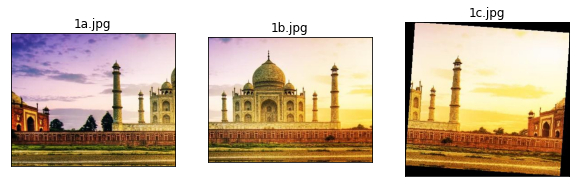

In [5]:
plt.figure(figsize=(10,5))

for i, image in enumerate(images):
    plt.subplot(1, 3, i + 1)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_image)
    plt.title(filenames[i])
    plt.xticks([]), plt.yticks([])

plt.show()

Kita akan merotasikan gambar 1c.jpg agar mirip dengan dua gambar sebelumnya. Angle disini kami tentukan berdasarkan hasil percobaan dan 4 merupakan nilai yang paling mendekati gambar yang lurus.

In [6]:
images[2] = imutils.rotate(images[2], 4)

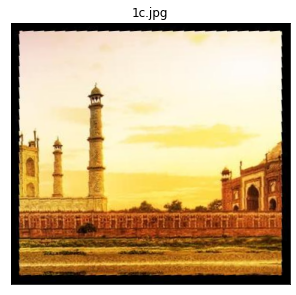

In [7]:
plt.figure(figsize=(5,5))
rgb_3rd_image = cv2.cvtColor(images[2], cv2.COLOR_BGR2RGB)
plt.imshow(rgb_3rd_image)
plt.title(filenames[2])
plt.xticks([]), plt.yticks([])
plt.show()

Kita melihat adanya padding hitam di sekitar gambar dan kita akan menghilangkannya dengan melakukan crop daerah yang berwarna saja.

In [8]:
print(images[2].shape)

(349, 372, 3)


In [9]:
images[2] = images[2][12:337, 12:360]

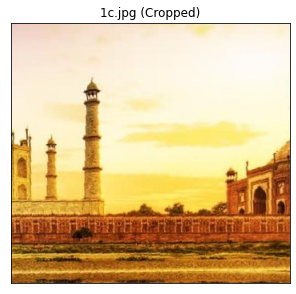

In [10]:
plt.figure(figsize=(5,5))
rgb_3rd_image = cv2.cvtColor(images[2], cv2.COLOR_BGR2RGB)
plt.imshow(rgb_3rd_image)
plt.title(filenames[2] + ' (Cropped)')
plt.xticks([]), plt.yticks([])
plt.show()

Sekarang, ketiga gambar kita siap untuk digabungkan.

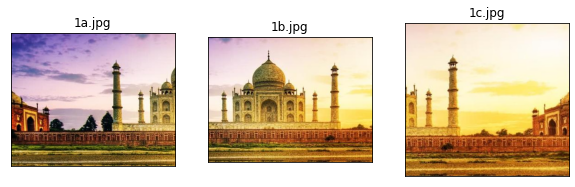

In [11]:
plt.figure(figsize=(10,5))

for i, image in enumerate(images):
    plt.subplot(1, 3, i + 1)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_image)
    plt.title(filenames[i])
    plt.xticks([]), plt.yticks([])

plt.show()

Algoritma penyambungan gambar dapat dibagi menjadi empat langkah, yaitu:

<ol>
<li>Deteksi keypoints (titik pada gambar) dan ekstraksi descriptors invarian lokal (menggunakan fitur SIFT) dari list images.</li>
<li>Menemukan descriptors yang cocok di antara list images.</li>
<li>Menghitung homography matrix menggunakan algoritma RANSAC.</li>
<li>Homography matrix kemudian diterapkan pada list images untuk membungkus dan menyesuaikan posisi masing-masing image dan menggabungkannya menjadi satu panorama image.</li>
</ol>

Kita akan menyatukan tiga gambar untuk membuat panorama Taj Mahal. Untuk menghasilkan panorama ini, gambar harus memiliki beberapa keypoints yang sama. Dengan kata lain, sebagian kecil dari gambar yang berurutan harus bisa tumpang tindih. Jika tidak, potongan-potongan gambar tidak dapat digabungkan. Disini, kita cukup menggunakan fungsi stitch().

In [12]:
stitcher = cv2.Stitcher_create()

Kita tahu bahwa fungsi stitch() menerima list images sebagai parameter dan mengembalikan tuple (status, stitched_image), di mana stiched_image adalah gambar panorama yang dihasilkan.

In [13]:
(status, stitched_image) = stitcher.stitch(images)

Kita tahu bahwa jika gambar berhasil digabungkan, fungsi stich() akan mengembalikan nilai 0.

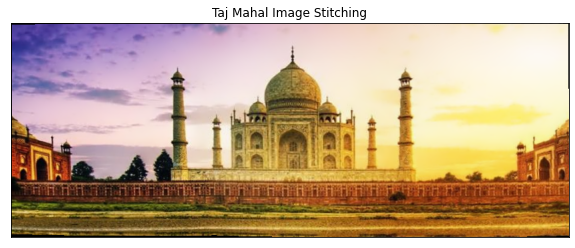

In [14]:
plt.figure(figsize=(10,5))

if status == 0:
    rgb_stitched_image = cv2.cvtColor(stitched_image, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_stitched_image)
    plt.title('Taj Mahal Image Stitching')
    plt.xticks([]), plt.yticks([])
else:
    print('Failed')

plt.show()

Walaupun kita telah menghilangkan daerah berwarna hitam pada 1c.jpg, ternyata masih terdapat sedikit padding hitam pada stiched_image. Seperti cara sebelumnya, kita akan menghilangkannya dengan melakukan crop daerah yang berwarna saja.

In [15]:
print(stitched_image.shape)

(322, 838, 3)


In [16]:
cropped_stitched_image = stitched_image[4:318, 0:834]

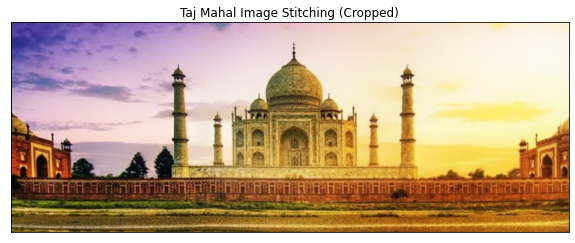

In [17]:
plt.figure(figsize=(10,5))
rgb_cropped_stitched_image = cv2.cvtColor(cropped_stitched_image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_cropped_stitched_image)
plt.title('Taj Mahal Image Stitching (Cropped)')
plt.xticks([]), plt.yticks([])
plt.show()

## THANK YOU